Label Description 
0 T-shirt/top 
1 Trouser 
2 Pullover 
3 Dress 
4 Coat 
5 Sandal 
6 Shirt 
7 Sneaker 
8 Bag 
9 Ankle boot

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# split the training and testing data into X (image) and Y (label) arrays

train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

x_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [5]:
# split the training data into train and validate arrays (will be used later)

x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

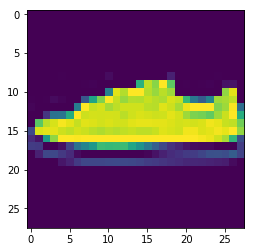

In [6]:
# lets see what the images look like

image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

## Create the CNN

- <b>Define the model</b>
- <b>Compile the model</b>
- <b>Fit the model</b>

In [7]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [8]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
tensorboard = TensorBoard(
    log_dir=r'logs\{}'.format('cnn_1layer'),
    write_graph=True,
    write_grads=True,
    histogram_freq=1,
    write_images=True,
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [10]:
cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=5, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 29s 598us/step - loss: 0.7589 - acc: 0.7569 - val_loss: 0.4821 - val_acc: 0.8310
Epoch 2/10
48000/48000 [==============================] - 27s 572us/step - loss: 0.4516 - acc: 0.8419 - val_loss: 0.4310 - val_acc: 0.8462
Epoch 3/10
48000/48000 [==============================] - 27s 569us/step - loss: 0.4007 - acc: 0.8595 - val_loss: 0.3693 - val_acc: 0.8739
Epoch 4/10
48000/48000 [==============================] - 28s 577us/step - loss: 0.3719 - acc: 0.8701 - val_loss: 0.3551 - val_acc: 0.8752
Epoch 5/10
48000/48000 [==============================] - 27s 570us/step - loss: 0.3521 - acc: 0.8768 - val_loss: 0.3383 - val_acc: 0.8810
Epoch 6/10
48000/48000 [==============================] - 27s 566us/step - loss: 0.3355 - acc: 0.8831 - val_loss: 0.3314 - val_acc: 0.8838
Epoch 7/10
48000/48000 [==============================] - 25s 513us/step - loss: 0.3241 - acc: 0.8861 - val_loss: 0.

In [11]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.2891
 test acc: 0.9022


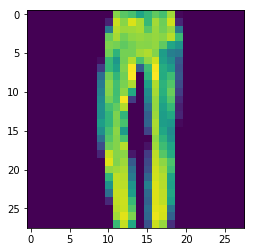

1.0


In [19]:

test = x_test[1, :].reshape((28, 28))

plt.imshow(test)
plt.show()

print(y_test[1])

In [15]:
test1=np.expand_dims(x_test[1], axis=0)
result =cnn_model.predict_classes(test1)
print(result)

[1]
